# Quasi-uniform grids

## Main idea:

1. introduce uniform grid $\xi$ on $[\alpha,\beta]$

2. introduce monotonous function $x=x(\xi)$

3. keep boundary conditions: $x(\alpha)=a$, $x(\beta)=b$

## Keep in mind:

###  $x_{n+1/2}=x(\xi_{n+1/2})\ne (x_{n+1}+x_n)/2$
###  $h_n\ne const \ne (b-a)/N$

## Consider two examples:

### 1. a=const, b=$\infty$

$x(\xi)=a+\frac{c\xi}{(1-\xi)^m}$, $0\le \xi < 1$

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

import warnings
warnings.filterwarnings("ignore")

In [53]:
N = 100
xi = np.linspace(0, 1, N)
c = 10
m = 1
a = 1

x = a+c*xi/(1-xi)**m

<IPython.core.display.Javascript object>


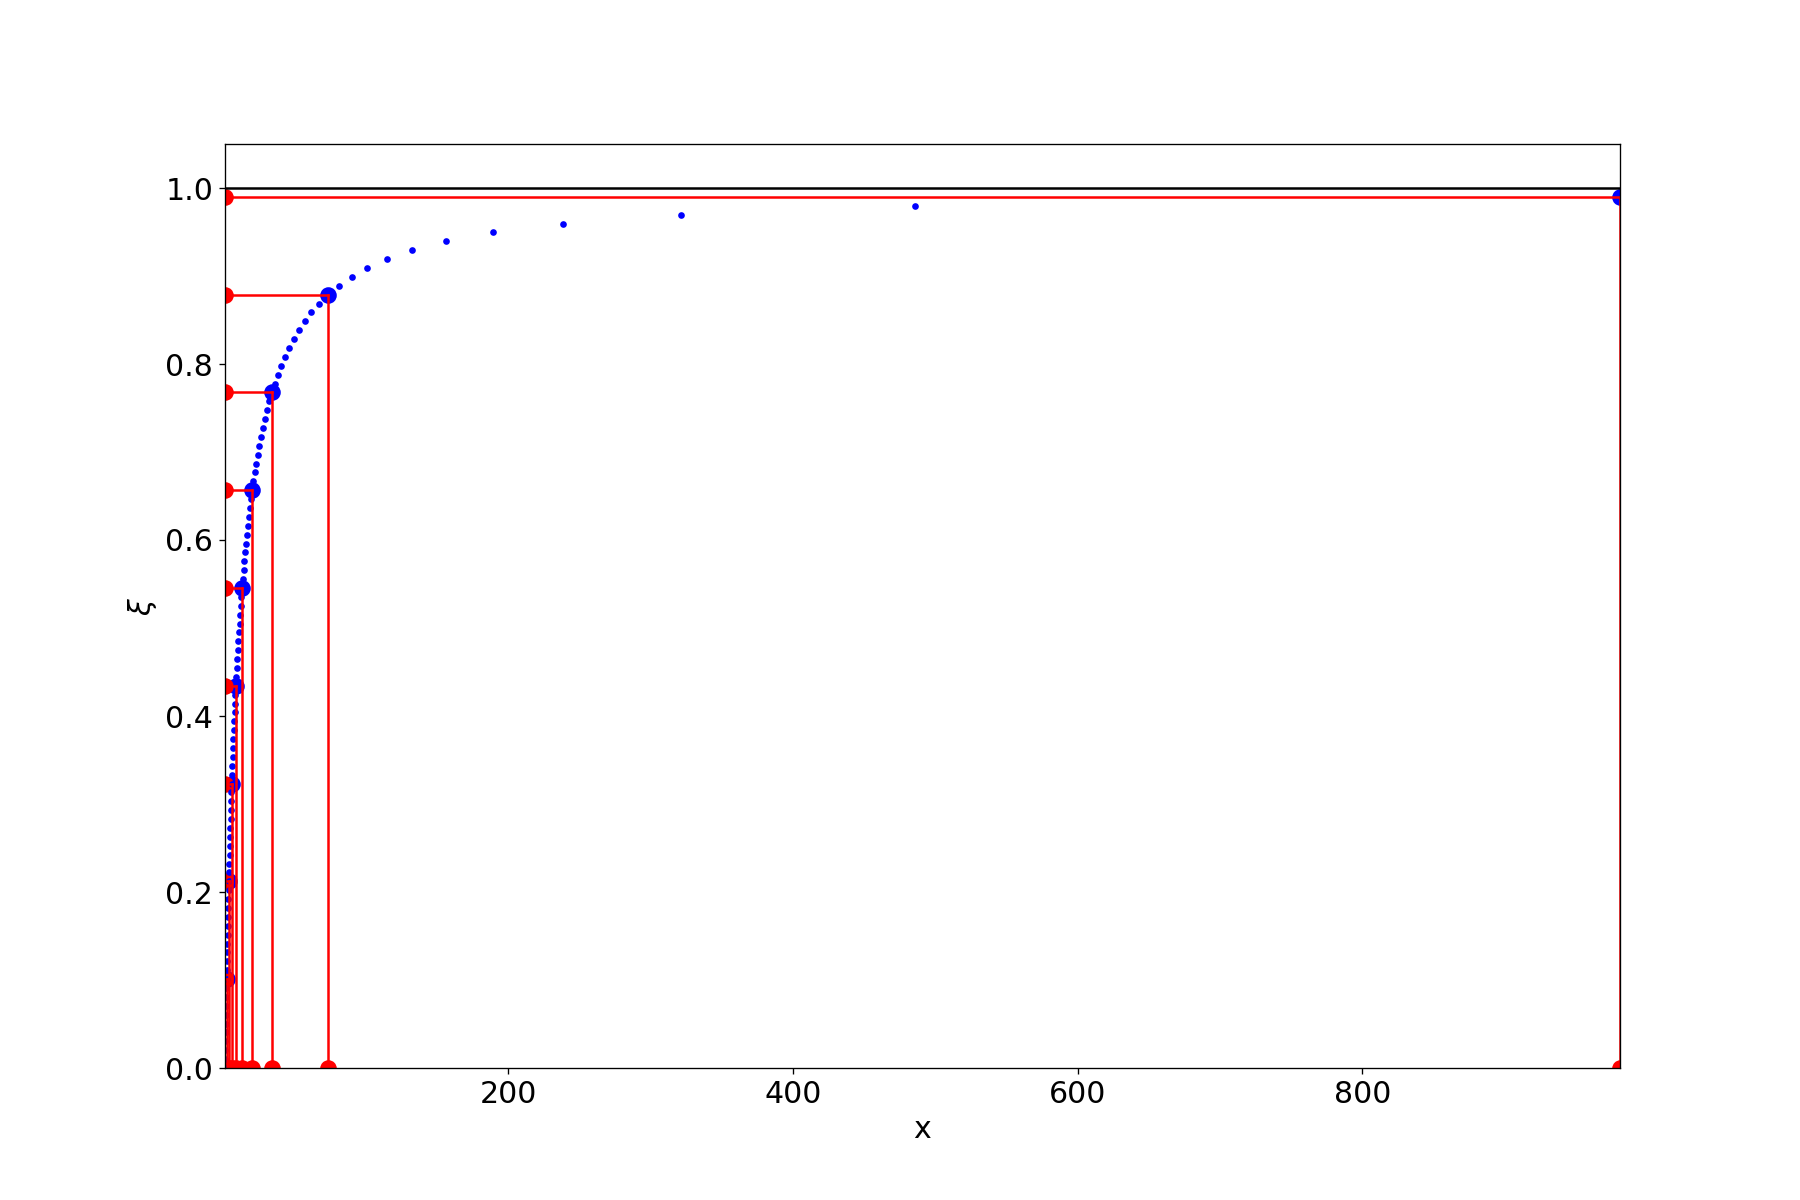

In [54]:
plt.figure(figsize=(15, 10))
plt.plot(x, np.ones(len(x)), 'k')
plt.plot(x, xi, 'b.')
plt.xlim([a, x[-2]])
plt.ylim([0, 1.05])
plt.xlabel('x')
plt.ylabel(r'$\xi$')
for ind in range(1, 10):
    indp = int(ind*11-1)
    plt.plot(x[:indp+1], xi[indp]*np.ones(len(x[:indp+1])), 'r')
    plt.plot(x[indp]*np.ones(len(xi[:indp+1])), xi[:indp+1], 'r')
    plt.scatter(x[indp], xi[indp], c='b', s=80)
    plt.scatter(1, xi[indp], c='r', s=80)
    plt.scatter(x[indp], 0, c='r', s=80)

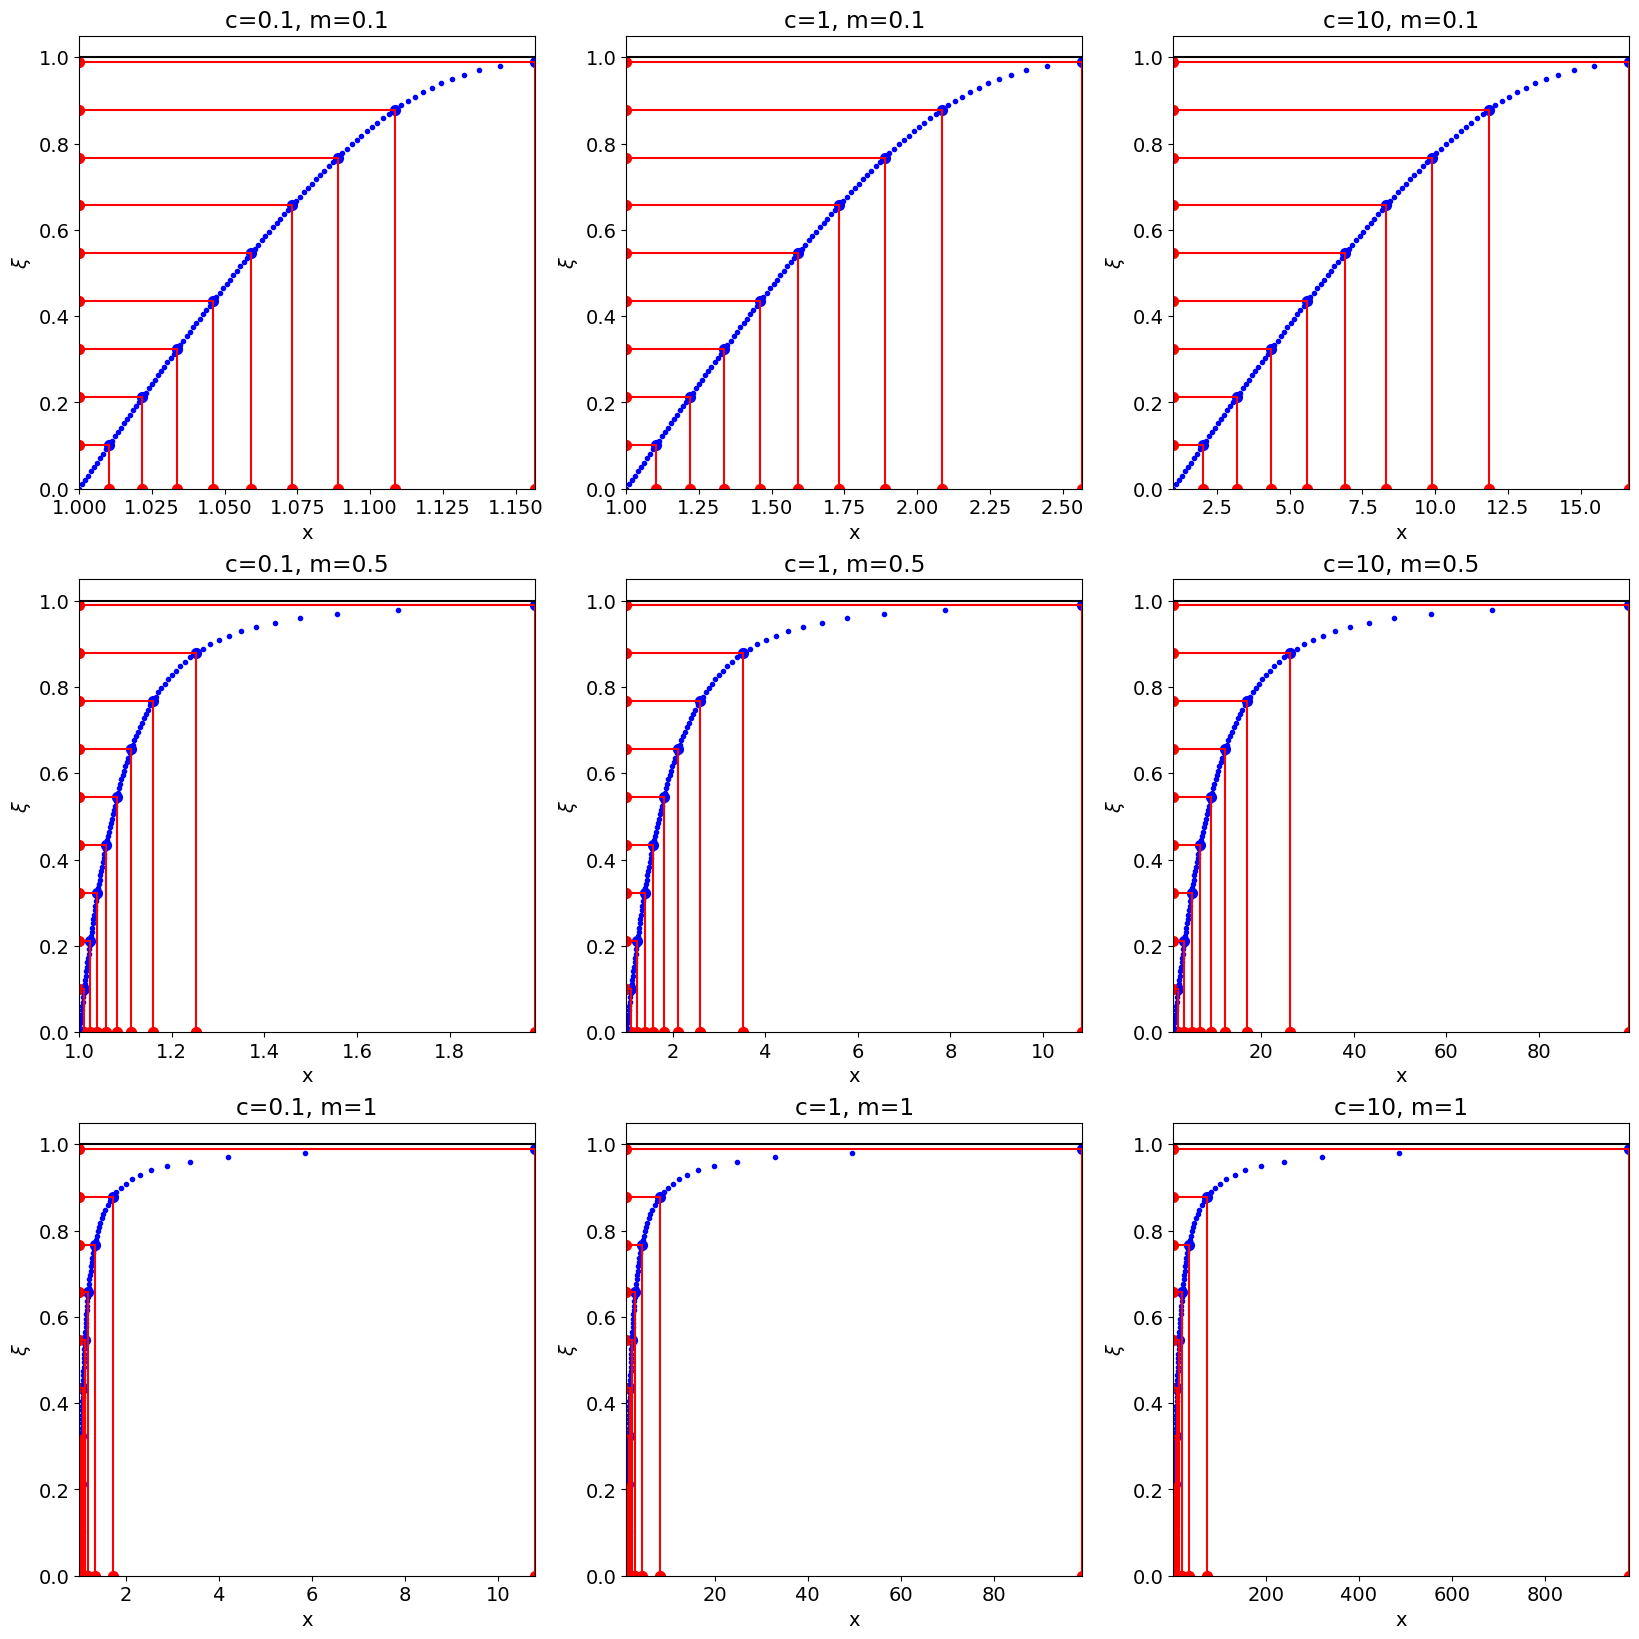

In [10]:
carr=[0.1,1,10]
marr=[0.1,0.5,1]

matplotlib.rcParams.update({'font.size': 14})
fig, ax= plt.subplots(3,3,figsize=(20,20))
for indc in range(len(carr)):
    for indm in range(len(marr)):
        x=a+carr[indc]*xi/(1-xi)**marr[indm]
        ax[indm,indc].plot(x,np.ones(len(x)),'k')
        ax[indm,indc].plot(x,xi,'b.')
        ax[indm,indc].set_xlim([a,x[-2]])
        ax[indm,indc].set_ylim([0,1.05])
        ax[indm,indc].set_xlabel('x')
        ax[indm,indc].set_ylabel(r'$\xi$')
        for ind in range(1,10):
            indp=int(ind*11-1)
            ax[indm,indc].plot(x[:indp+1],xi[indp]*np.ones(len(x[:indp+1])),'r')
            ax[indm,indc].plot(x[indp]*np.ones(len(xi[:indp+1])),xi[:indp+1],'r')
            ax[indm,indc].scatter(x[indp],xi[indp],c='b',s=50)
            ax[indm,indc].scatter(1,xi[indp],c='r',s=50)
            ax[indm,indc].scatter(x[indp],0,c='r',s=50)
            ax[indm,indc].set_title('c={}, m={}'.format(carr[indc],marr[indm]))

### 2. a=$-\infty$, b=$\infty$

$x(\xi)=\frac{c\xi}{(1-\xi^2)^m}$, $-1\le \xi < 1$

In [55]:
xi = np.linspace(-1, 1, 2*N)
c = 1
m = 0.6

x = c*xi/(1-xi**2)**m

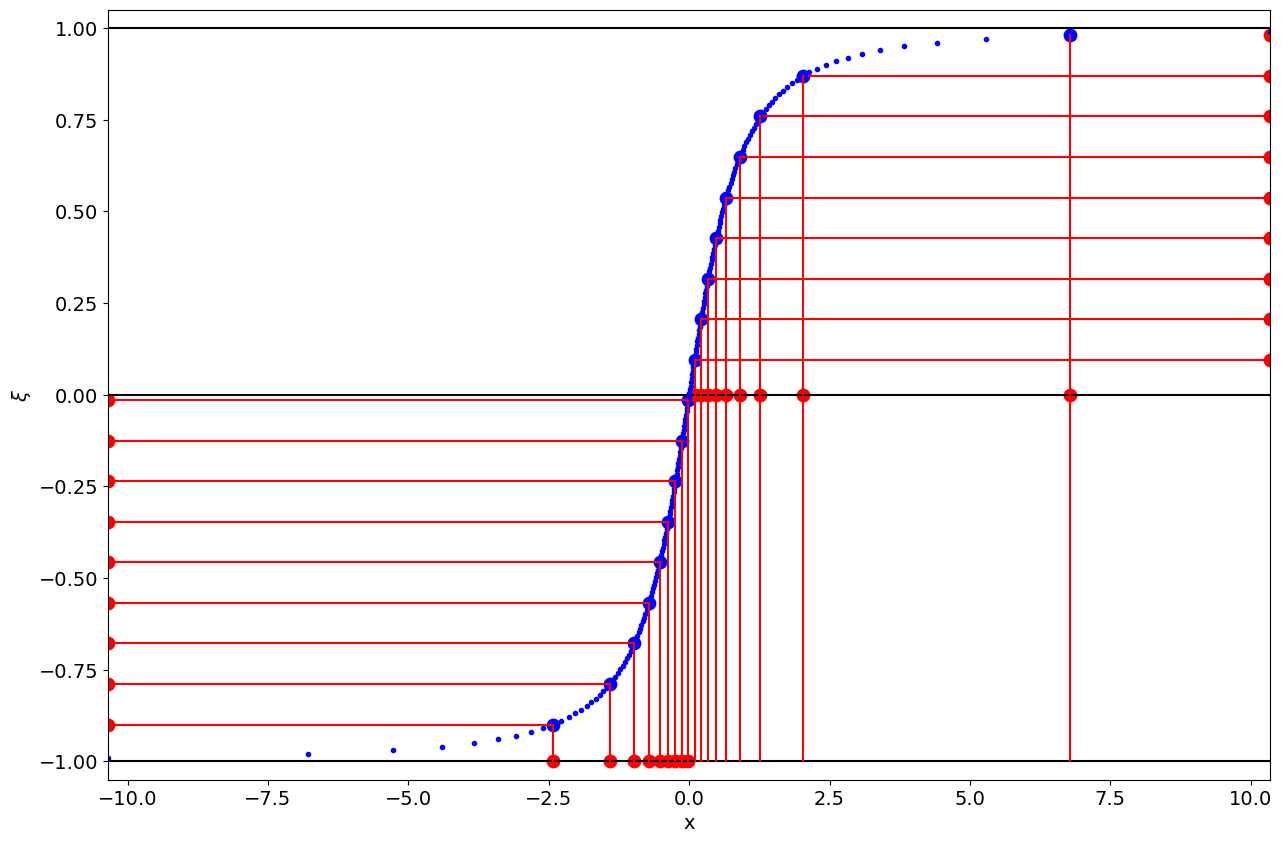

In [12]:
plt.figure(figsize=(15,10))
plt.plot(x,np.ones(len(x)),'k')
plt.plot(x,-np.ones(len(x)),'k')
plt.plot(x,np.zeros(len(x)),'k')
plt.plot(x,xi,'b.')
plt.xlim([x[1],x[-2]])
plt.ylim([-1.05,1.05])
plt.xlabel('x')
plt.ylabel(r'$\xi$')
for ind in range(1,10):
    indp=int(ind*11-1)
    plt.plot(x[:indp+1],xi[indp]*np.ones(len(x[:indp+1])),'r')
    plt.plot(x[indp]*np.ones(len(xi[:indp+1])),xi[:indp+1],'r')
    plt.scatter(x[indp],xi[indp],c='b',s=80)
    plt.scatter(x[1],xi[indp],c='r',s=80)
    plt.scatter(x[indp],-1,c='r',s=80)

for ind in range(10,19):
    indp=int(ind*11-1)
    plt.plot(x[indp+1:],xi[indp]*np.ones(len(x[indp+1:])),'r')
    plt.plot(x[indp]*np.ones(len(xi[:indp+1])),xi[:indp+1],'r')
    plt.scatter(x[indp],xi[indp],c='b',s=80)
    plt.scatter(x[-2],xi[indp],c='r',s=80)
    plt.scatter(x[indp],0,c='r',s=80)

# 2. Derivatives

## $u_n'\sim\frac{u_{n+1}-u_{n-1}}{x_{n+1}-x_{n-1}}=\frac{u_{n+1}-u_{n-1}}{h_{n+1}+h_{n-1}}+O(N^{-2})$

## $u_n''\sim\frac{u'_{n+1/2}-u'_{n-1/2}}{x_{n+1/2}-x_{n-1/2}}=\frac{2}{h_{n+1}+h_{n}}\left(\frac{u_{n+1}-u_{n}}{h_{n+1}}-\frac{u_{n}-u_{n-1}}{h_{n}}\right)+O(N^{-2})$

# 3. Boundary value problem

## $L[y]=y''+p(x)y+q(x)y=f(x)$

## $l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

## $l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

Let's consider two approaches:

## 3.1. Finite differences method

As usual introduce the grid: $x_i$, $y_i=y(x_i)$ ...

$y'(x_i)=\frac{y(x_{i+1})-y(x_{i-1})}{2h_i}$

$y''(x_i)=\frac{y(x_{i+1})-2y(x_{i})+y(x_{i-1})}{h_i^2}$

## $\rightarrow \left(1+h_i/2 p_i\right) y_{i+1}-\left(2-h_i^2q_i\right)y_i+\left(1-h/2 p_i\right) y_{i-1}=h_i^2 f_i$

## N-1 equations, N+1 unknown variables

## +2 boundary conditions

### need to solve  an LES

### Stability criterion: $|h_i p_i|<2$

# 3.2 Galerkin method

## Main idea:

1. Chose set of basis functions $\phi_i$ and fit $y_n=\sum_i^n c_i \phi_i$

2. Initial equation: $Ly_n=f \; \rightarrow$ system $(Ly_n,\phi_i)=(f,\phi_i)$

### $\sum_j^n (L\phi_j,\phi_i) c_j=(f,\phi_i) \; \rightarrow \sum_j a_{ij}c_j = d_i$

where $a_{ij}=(L\phi_j,\phi_i)$, $b_i=(f,\phi_i)$

and $(u,v)=\int_a^b u(x)v(x)dx$

### Let's try to find the following solution:

$y_n(x)=\phi_0+\sum_{j=1}^n c_i\phi_i(x)$

$l_a(\phi_0)=A$, $l_a(\phi_i)=0$, $\forall i>0$

$l_b(\phi_0)=B$, $l_b(\phi_i)=0$, $\forall i>0$

so $L\left(\sum_{i=1}^m c_i \phi_i \right) = f -L(\phi_0)$

$L(\phi_0)=\phi_0''+p(x)\phi_0'+q(x)\phi_0$

## Consider the problem:

$\frac{d}{dx}\left(D(x)\frac{df(x)}{dx}\right)=g(x)$

$f(-\infty)=0, \; f(\infty)=0$

where $D(x)=\frac{x^2}{2}$, $g(x)=(2x^4-3x^2)\exp(-x^2)$

Analytical solution: $f(x)=\exp(-x^2)$

## 1. FDM

$\frac{dD(x)}{dx}\frac{df(x)}{dx}+D(x)\frac{d^2f(x)}{dx^2}=g(x)$

1.1. Quasi-uniform grid

### $u_n'\sim\frac{u_{n+1}-u_{n-1}}{x_{n+1}-x_{n-1}}\sim\frac{u_{n+1}-u_{n-1}}{2(x_{n+1/2}-x_{n-1/2})}+O(N^{-2})$

### $u_n''\sim\frac{u'_{n+1/2}-u'_{n-1/2}}{x_{n+1/2}-x_{n-1/2}}=\frac{1}{2(x_{n+1/2}-x_{n-1/2})}\left(\frac{u_{n+1}-u_{n}}{x_{n+3/4}-x_{n+1/4}}-\frac{u_{n}-u_{n-1}}{x_{n-1/4}-x_{n-3/4}}\right)+O(N^{-2})$



In [56]:
from scipy.linalg import solve
N = 100
dxi = 2/(N-1)


def xQU(xi):
    c = 1
    m = 1
    a = 0
    return a+c*xi/(1-xi**2)**m


def gg(x):
    return (2*x**4-3*x**2)*np.exp(-x**2)


def D(x):
    return x**2/2


def dD(x):
    return x


M = np.zeros([N, N])
g = np.zeros(N)
g[0] = 0
g[-1] = 0


M[0, 0] = 1
M[-1, -1] = 1
for ind in range(1, N-1):
    M[ind, ind-1] -= dD(xQU(-1+ind*dxi)) / \
        (2*(xQU(-1+(ind+1/2)*dxi)-xQU(-1+(ind-1/2)*dxi)))
    M[ind, ind-1] += D(xQU(-1+ind*dxi))/(2*(xQU(-1+(ind+1/2)*dxi) -
                                            xQU(-1+(ind-1/2)*dxi)))/(xQU(-1+(ind-1/4)*dxi)-xQU(-1+(ind-3/4)*dxi))

    M[ind, ind] -= D(xQU(-1+ind*dxi))/(2*(xQU(-1+(ind+1/2)*dxi) -
                                          xQU(-1+(ind-1/2)*dxi)))/(xQU(-1+(ind+3/4)*dxi)-xQU(-1+(ind+1/4)*dxi))
    M[ind, ind] -= D(xQU(-1+ind*dxi))/(2*(xQU(-1+(ind+1/2)*dxi) -
                                          xQU(-1+(ind-1/2)*dxi)))/(xQU(-1+(ind-1/4)*dxi)-xQU(-1+(ind-3/4)*dxi))

    M[ind, ind+1] += dD(xQU(-1+ind*dxi)) / \
        (2*(xQU(-1+(ind+1/2)*dxi)-xQU(-1+(ind-1/2)*dxi)))
    M[ind, ind+1] += D(xQU(-1+ind*dxi))/(2*(xQU(-1+(ind+1/2)*dxi) -
                                            xQU(-1+(ind-1/2)*dxi)))/(xQU(-1+(ind+3/4)*dxi)-xQU(-1+(ind+1/4)*dxi))

    g[ind] = (2*xQU(-1+ind*dxi)**4-3*xQU(-1+ind*dxi)**2) * \
        np.exp(-xQU(-1+ind*dxi)**2)
sol = solve(M, g)

In [16]:
M[:4,:4]

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.44002265, -0.87228737,  0.43226473,  0.        ],
       [ 0.        ,  1.90072866, -3.76198935,  1.86126069],
       [ 0.        ,  0.        ,  4.22963174, -8.3655093 ]])

In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


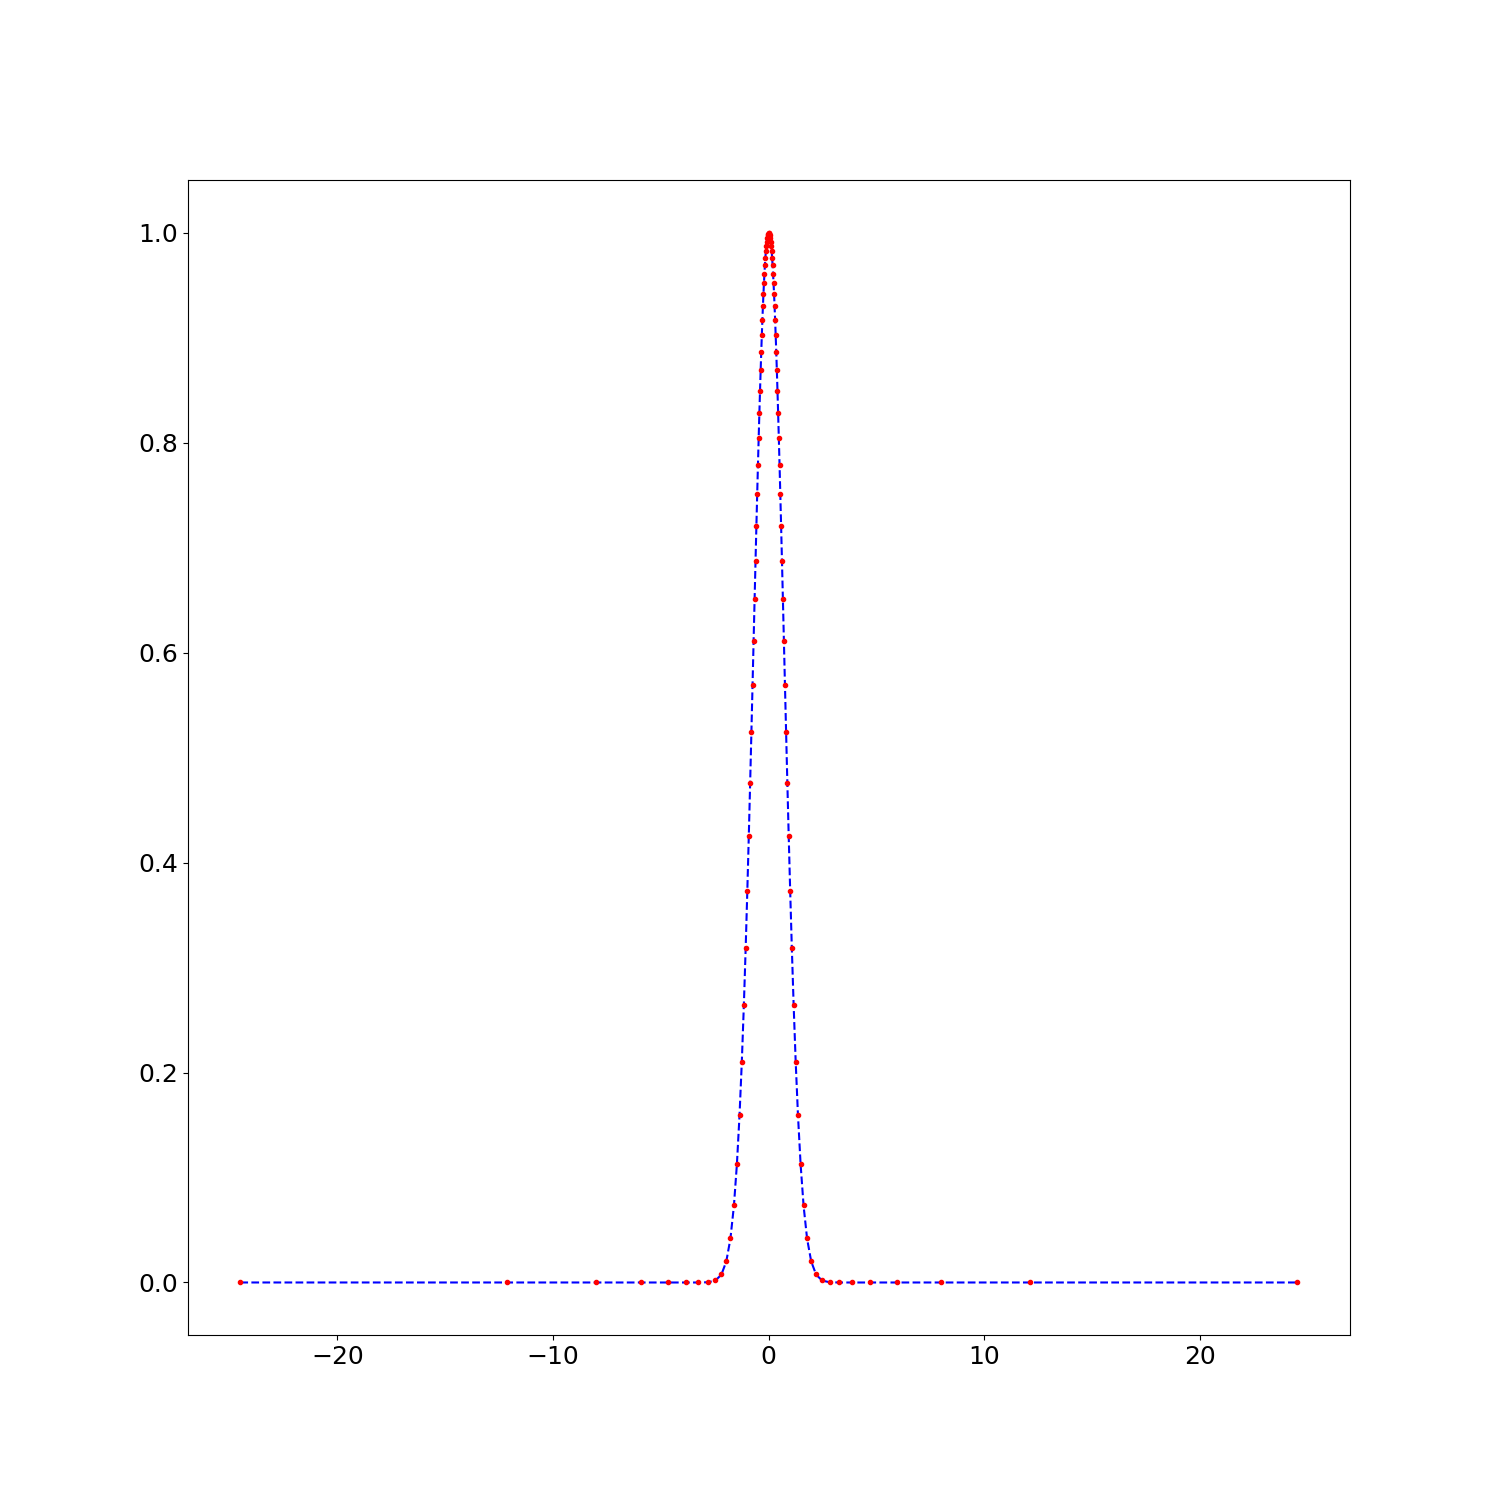

In [58]:
x = xQU(np.linspace(-1, 1, N))
plt.figure(figsize=(15, 15))
plt.plot(x, sol, 'b--')
plt.plot(x, np.exp(-x**2), 'r.')

In [59]:
print(f'L_2 difference: {np.linalg.norm(sol-np.exp(-x**2))}')

L_2 difference: 0.00410455165228321


<IPython.core.display.Javascript object>


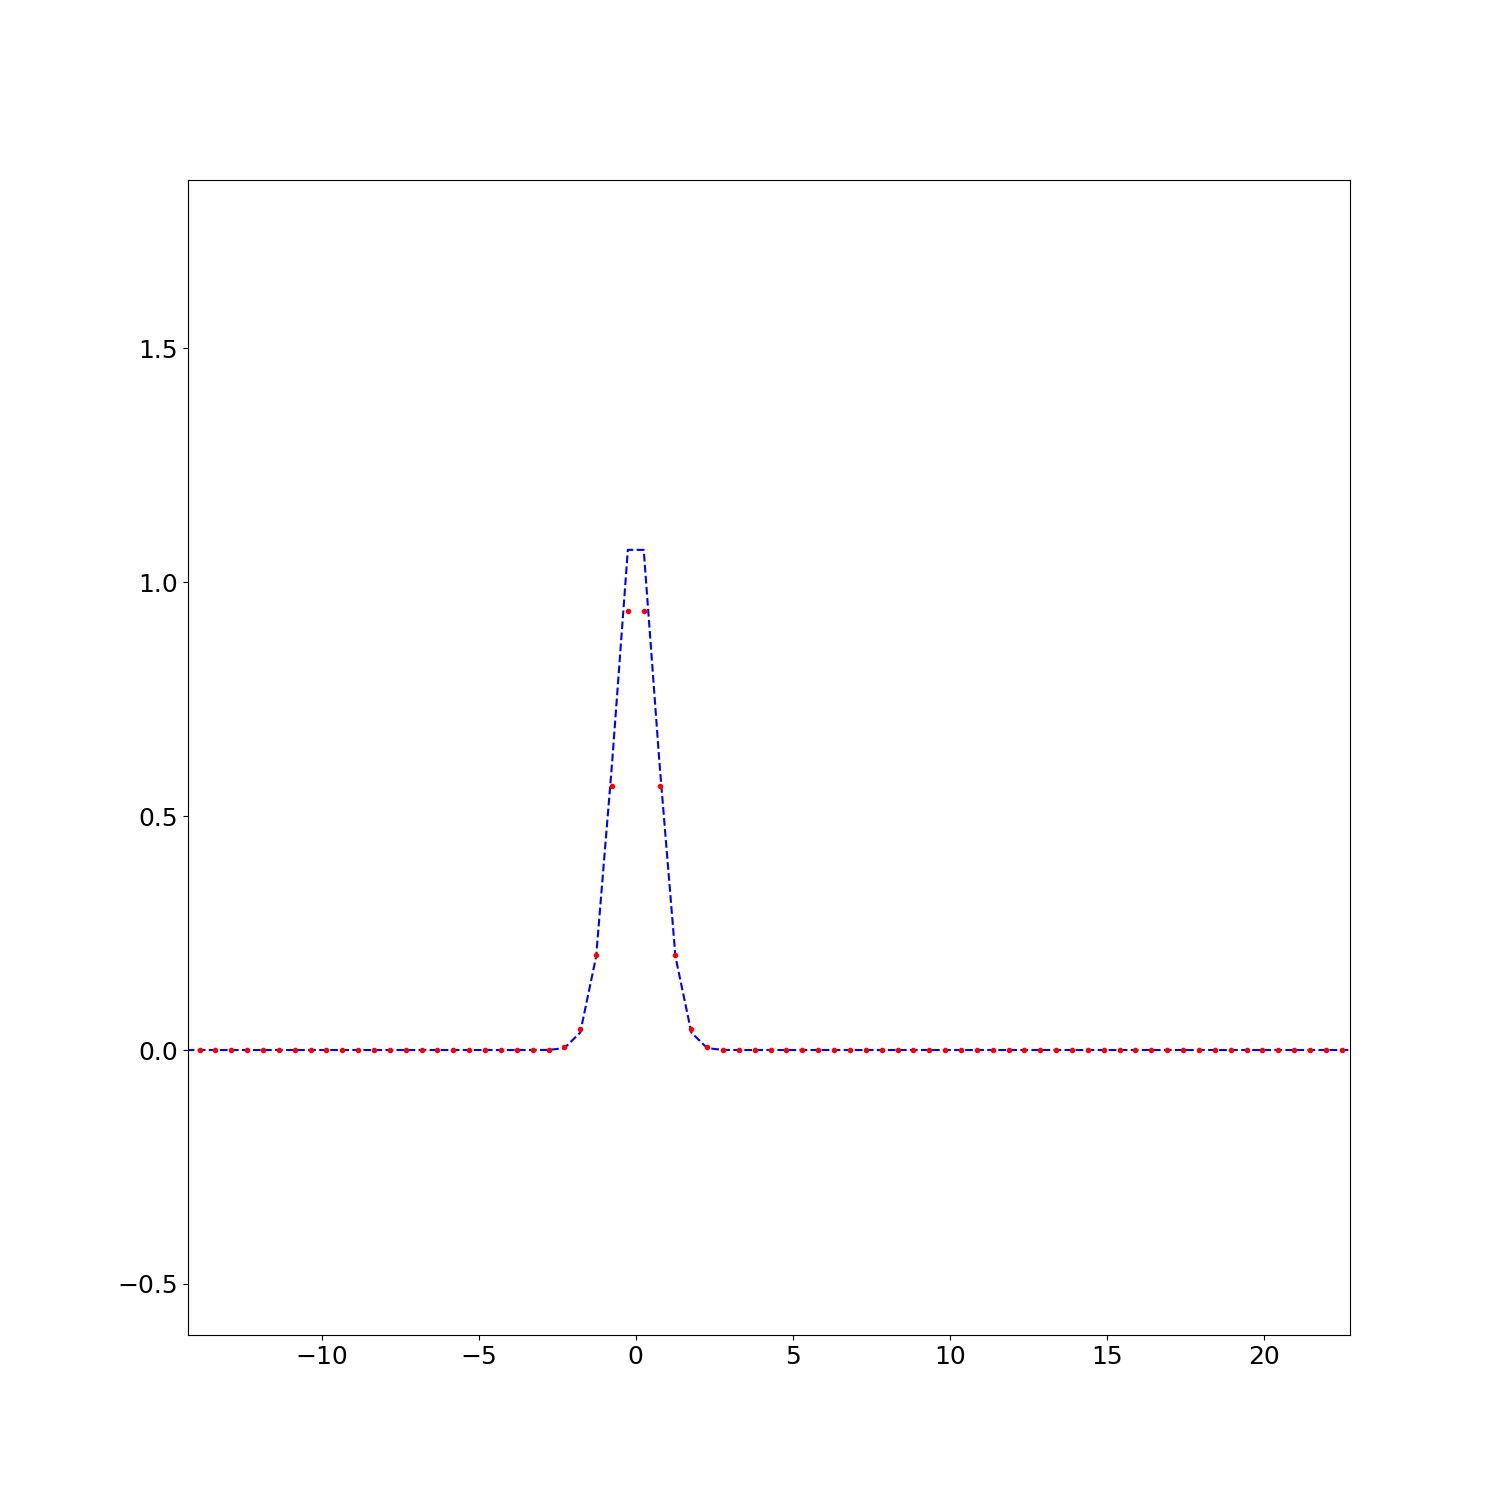

L_2 difference: 0.19704190675353014


In [60]:
x, dx = np.linspace(-25, 25, N, retstep=True)

M = np.zeros([N, N])
g = np.zeros(N)
g[0] = 0
g[-1] = 0


M[0, 0] = 1
M[-1, -1] = 1
for ind in range(1, N-1):
    M[ind, ind-1] = -dD(x[ind])/2/dx+D(x[ind])/dx**2

    M[ind, ind] = D(x[ind])*(-2/dx**2)

    M[ind, ind+1] = dD(x[ind])/2/dx+D(x[ind])/dx**2

solun = solve(M, gg(x))

plt.figure(figsize=(15, 15))
plt.plot(x, solun, 'b--')
plt.plot(x, np.exp(-x**2), 'r.')

print('L_2 difference: {}'.format(np.linalg.norm(solun-np.exp(-x**2))))

## 2. Galerkin method

Let's use $\phi_n(x) = x^n \exp(-x^2)$

In [61]:
def p(n, x):
    return x**n*np.exp(-x**2)


def dp(n, x):
    df = n*x**(n-1)*np.exp(-x**2)-2*x**(n+1)*np.exp(-x**2)
    return df


def ddp(n, x):
    ddf = (n*(n-1)*x**(n-2)-2*n*x**n-2*(n+1)*x**n+4*x**(n+2))*np.exp(-x**2)
    return ddf

In [62]:
from scipy.integrate import simps

Np = 4

M = np.zeros([Np, Np])
d = np.zeros(Np)
x2 = x[1:-1]
for ind1 in range(Np):
    d[ind1] = simps(gg(x2)*p(ind1, x2), x=x2)
    for ind2 in range(Np):
        M[ind1, ind2] = simps(
            (D(x2)*ddp(ind2, x2)+dD(x2)*dp(ind2, x2))*p(ind1, x2), x=x2)

Gcoeff = solve(M, d)

<IPython.core.display.Javascript object>


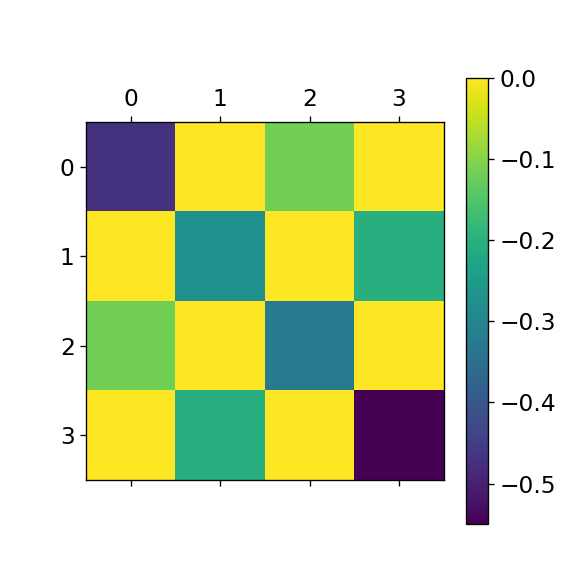

In [36]:
plt.matshow(M)
plt.colorbar()

<IPython.core.display.Javascript object>


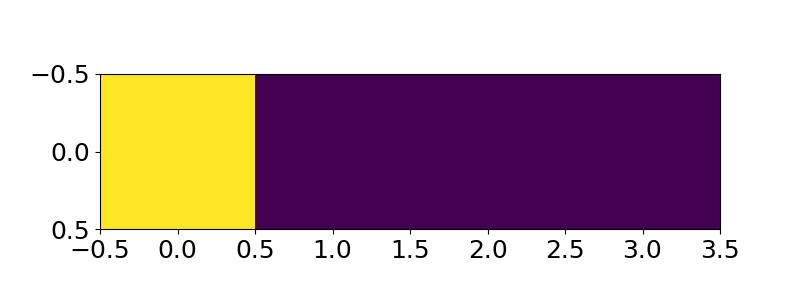

In [63]:
plt.figure(figsize=(8,3))
plt.imshow(Gcoeff.reshape(1,-1))

In [67]:
solG=np.zeros_like(x)
for ind in range(Np):
    solG+=Gcoeff[ind]*p(ind,x)

In [68]:
print('L_2 difference: {}'.format(np.linalg.norm(solG-np.exp(-x**2))))

L_2 difference: 2.4248588016785365e-16


In [66]:
Gcoeff

array([ 1.00000000e+00, -3.77407895e-17,  4.54535442e-32, -1.18337693e-16])

___

In [51]:
from visual import*
from visual.graph import*
import random
random.seed(None)
jmax=20
x=0.;
#Seedgenerator,None=>systemclock
y=0.
#Startatorigin
graph1=gdisplay(width=500,height=500,title='RandomWalk',xtitle='x',ytitle='y')
pts=gcurve(color=color.yellow)
for i in range(0,jmax+1):
    pts.plot(pos=(x,y))
    x+=(random.random()- 0.5)*2.
    y+=(random.random()-0.5)*2.
    pts.plot(pos=(x,y))
    rate(100)
#Plotpoints
#−1=<x=<1
#−1=<y=<a

ModuleNotFoundError: No module named 'visual'